In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import pandas as pd

%matplotlib inline

| Variable Name |Description | Type variabele?
| --- | --- | --- |
|Price 	| price in US dollars | continue|
|Carat | weight of the diamond | continue|
|Cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal)|ordinaal |
|Color | diamond colour, from J (worst) to D (best)| ordinaal|
|Clarity | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|ordinal |
|x | length in mm| continue|
|y 	|width in mm| continue|
|z  |depth in mm| continue|
|depth |total depth percentage = z / mean(x, y) = 2 * z / (x + y) | continue|
|table  | width of top of diamond relative to widest point | continue|

In [189]:
df = pd.read_csv('diamond.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.79,Ideal,E,SI1,NaN,55.0,3256.0,5.97,NaN,3.67
1,0.70,Very Good,G,VS1,62.8,57.0,2475.0,5.63,5.68,3.55
2,1.10,Premium,E,SI2,60.0,60.0,4201.0,6.70,6.73,4.03
3,0.79,Premium,H,SI1,61.8,59.0,2275.0,5.97,5.91,3.67
4,0.30,Ideal,H,VVS2,62.1,55.0,590.0,4.33,4.36,2.70


In [190]:
df.describe()

,carat,depth,table,price,x,y,z
count,12247.000000,12241.000000,12235.000000,12245.000000,12246.000000,12219.000000,12233.000000
mean,0.804289,61.759456,57.447887,3961.343977,5.747539,5.746815,3.548439
std,0.479756,1.408394,2.220501,3997.575353,1.125743,1.113941,0.698310
min,0.200000,44.000000,49.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,956.000000,4.730000,4.730000,2.920000
50%,0.710000,61.800000,57.000000,2441.000000,5.700000,5.720000,3.530000
75%,1.050000,62.500000,59.000000,5387.000000,6.550000,6.540000,4.050000
max,5.010000,72.900000,71.000000,18795.000000,10.740000,10.540000,6.980000


In [191]:
df = df[df.x>0]
df =df[df.y>0]
df=df[df.z>0]

In [192]:
df.isnull().sum()

carat      236
cut        272
color      260
clarity    253
depth      237
table      238
price      243
x            0
y            0
z            0
dtype: int64

In [193]:
df= df.dropna()

In [194]:
df.shape

(10073, 10)

In [195]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

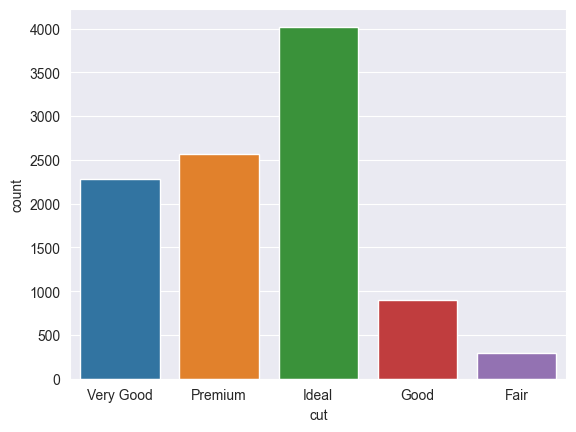

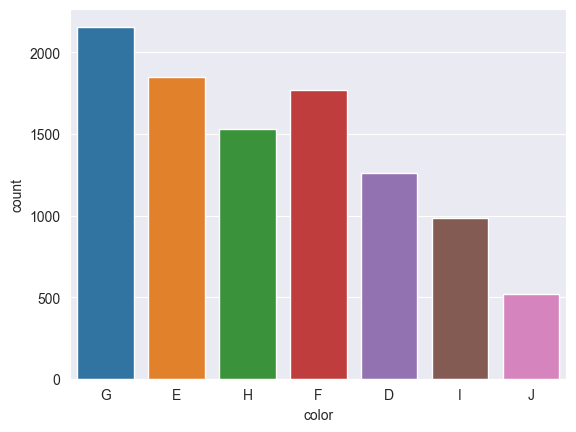

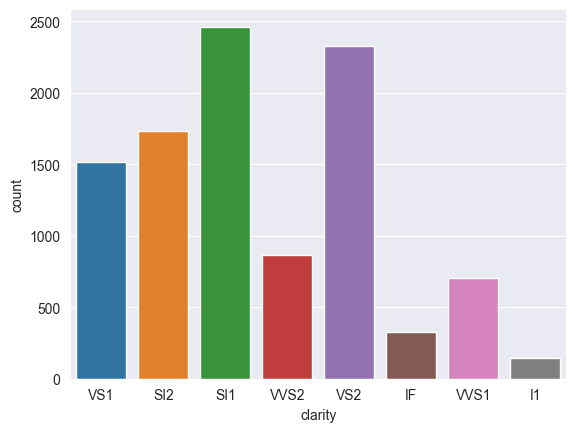

In [196]:
l = ['cut', 'color','clarity']
for i in l:
    sns.countplot(x=i, data=df)
    plt.show()

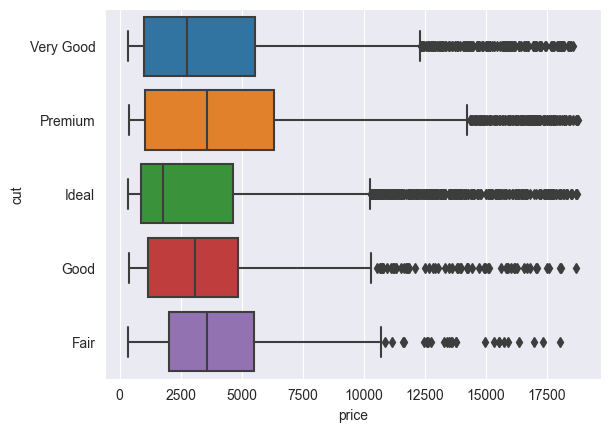

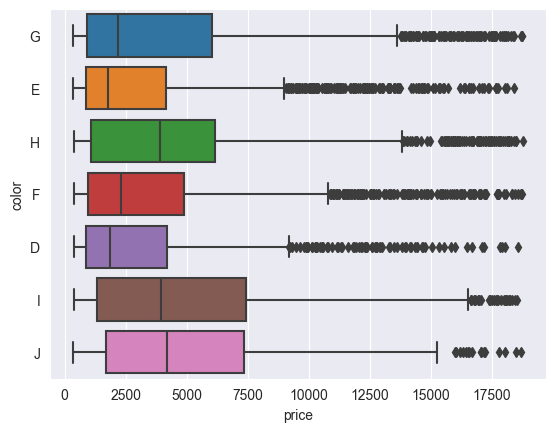

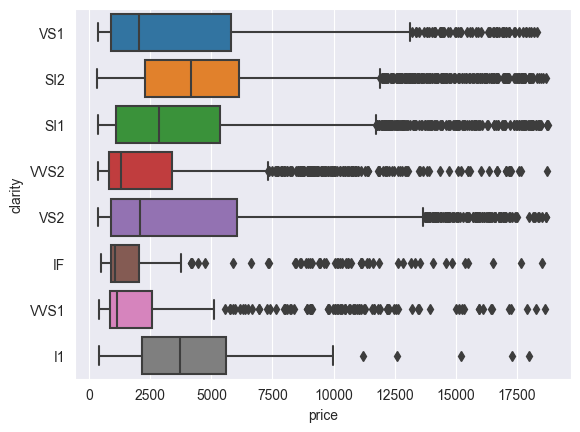

In [197]:
for i in l:
    sns.boxplot(data=df,x='price', y=i)
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use s

<AxesSubplot:xlabel='price', ylabel='cut'>

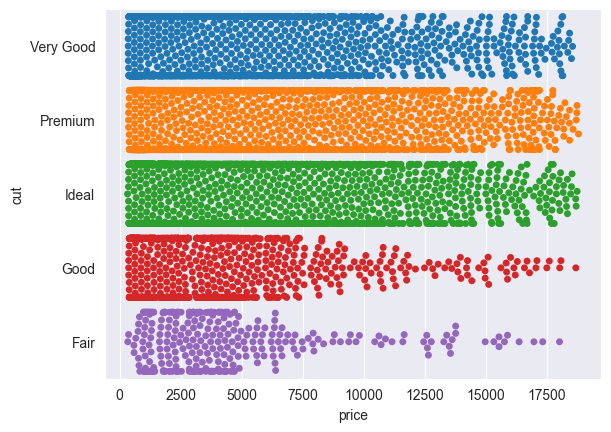

In [198]:
sns.swarmplot(data=df,x='price',y='cut')

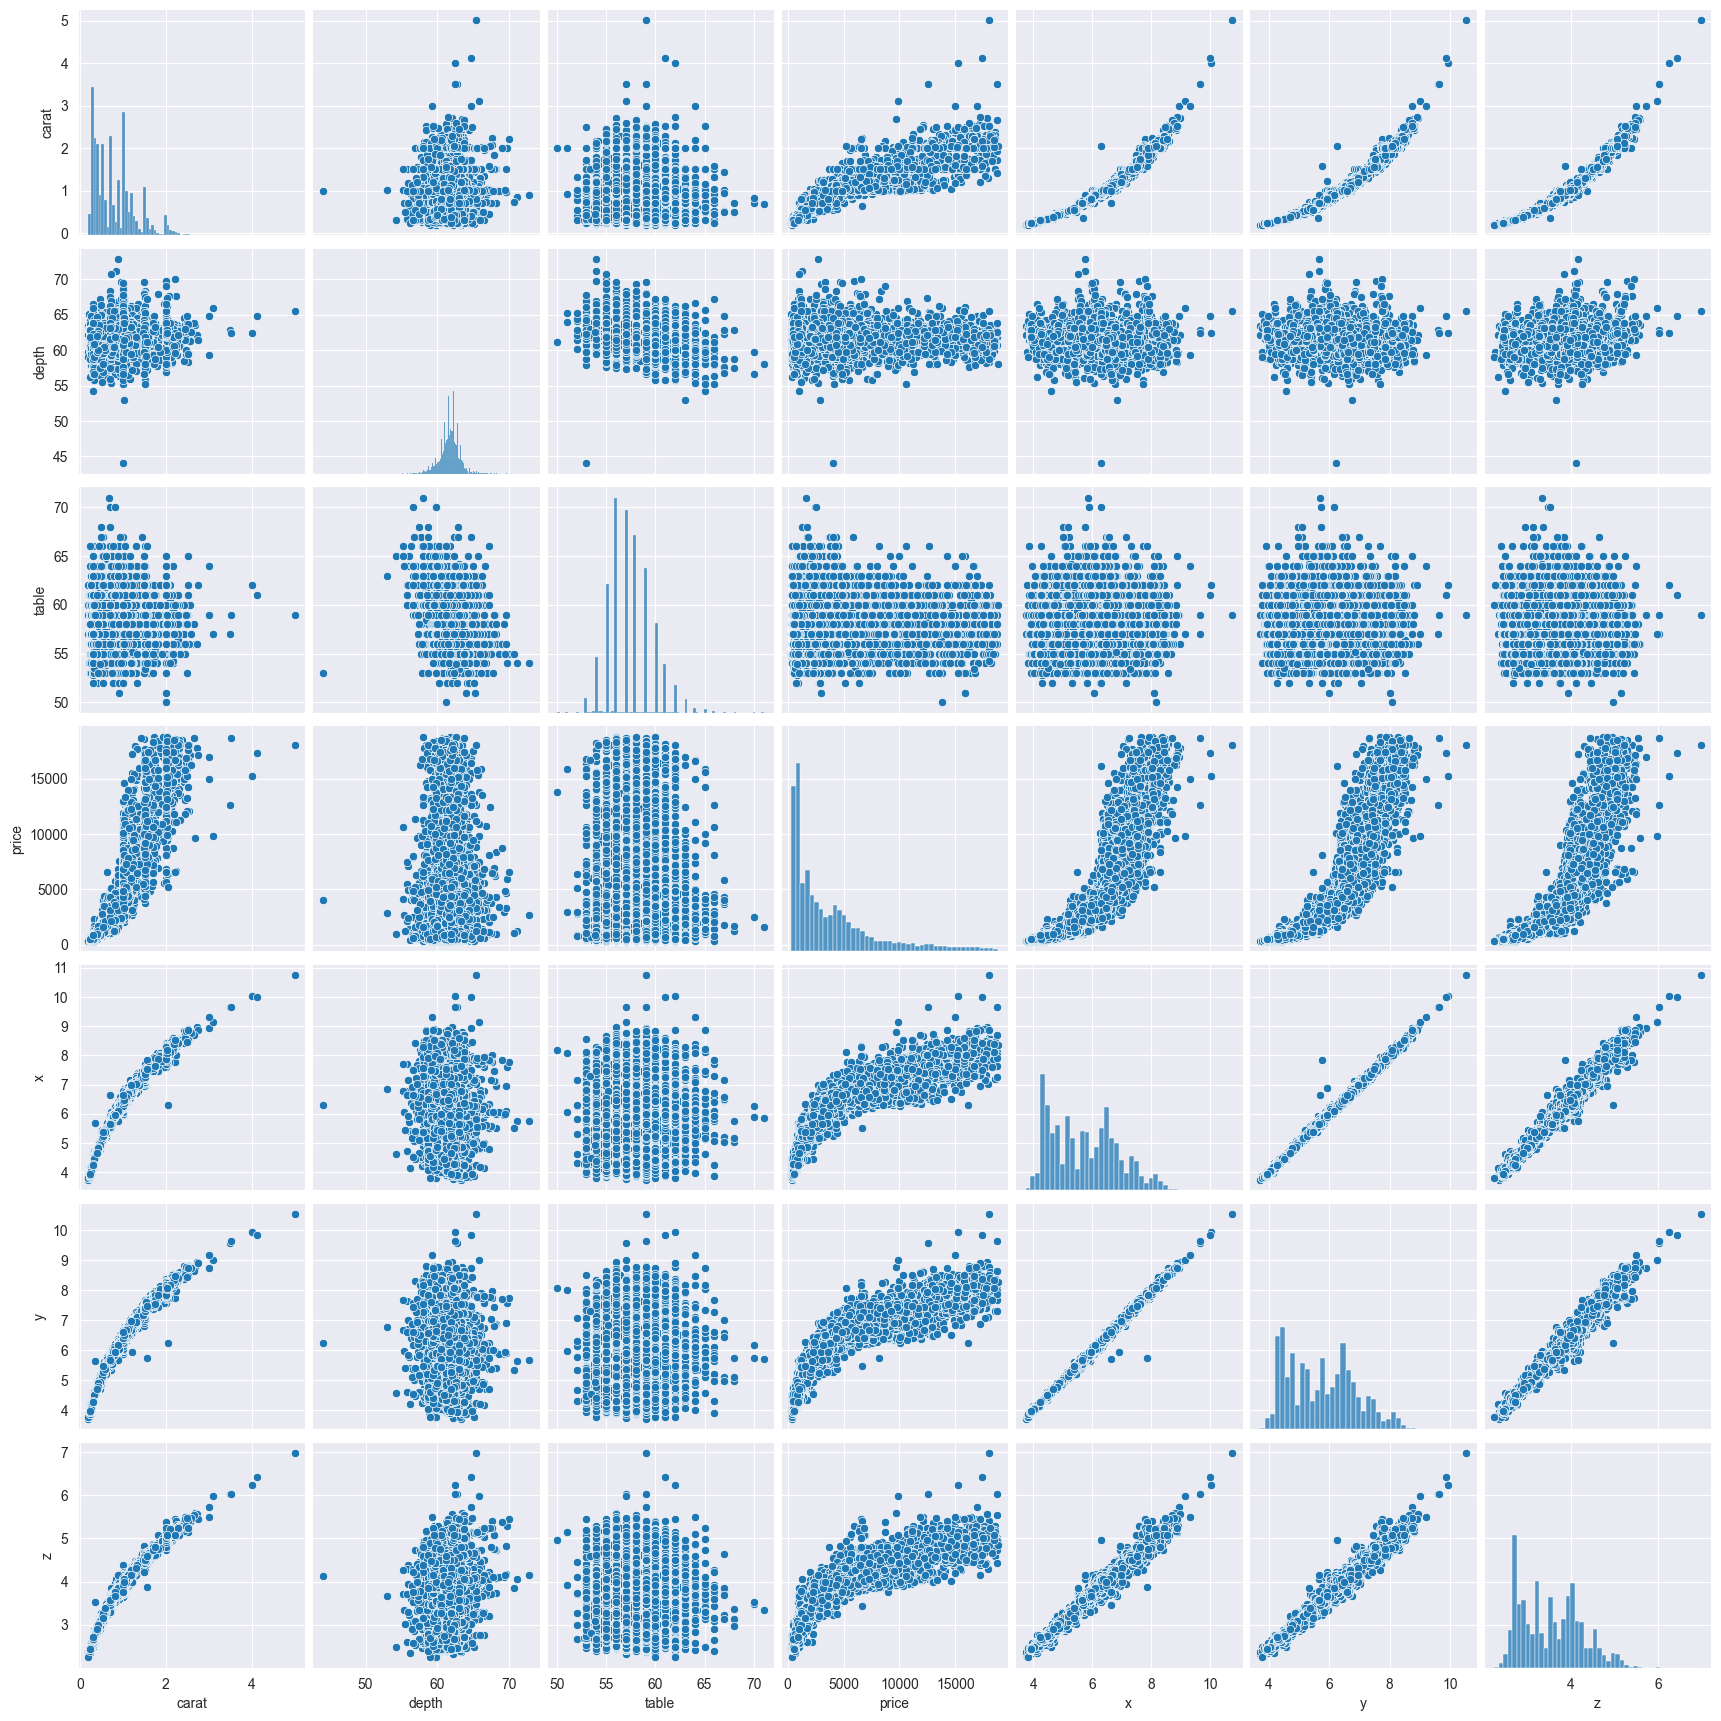

In [199]:
sns.pairplot(data=df)

<AxesSubplot:>

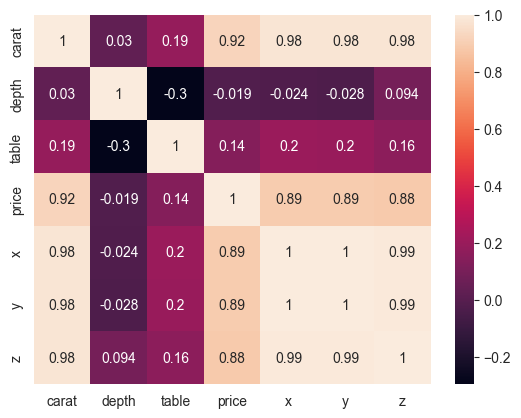

In [200]:
corr =df.corr()
sns.heatmap(data=corr, annot=True)

In [201]:
df.drop(['x','y'], inplace=True, axis=1)

In [202]:
df.head()

,carat,cut,color,clarity,depth,table,price,z
1,0.70,Very Good,G,VS1,62.8,57.0,2475.0,3.55
2,1.10,Premium,E,SI2,60.0,60.0,4201.0,4.03
3,0.79,Premium,H,SI1,61.8,59.0,2275.0,3.67
4,0.30,Ideal,H,VVS2,62.1,55.0,590.0,2.70
5,2.01,Very Good,H,SI1,60.6,62.0,16582.0,4.89


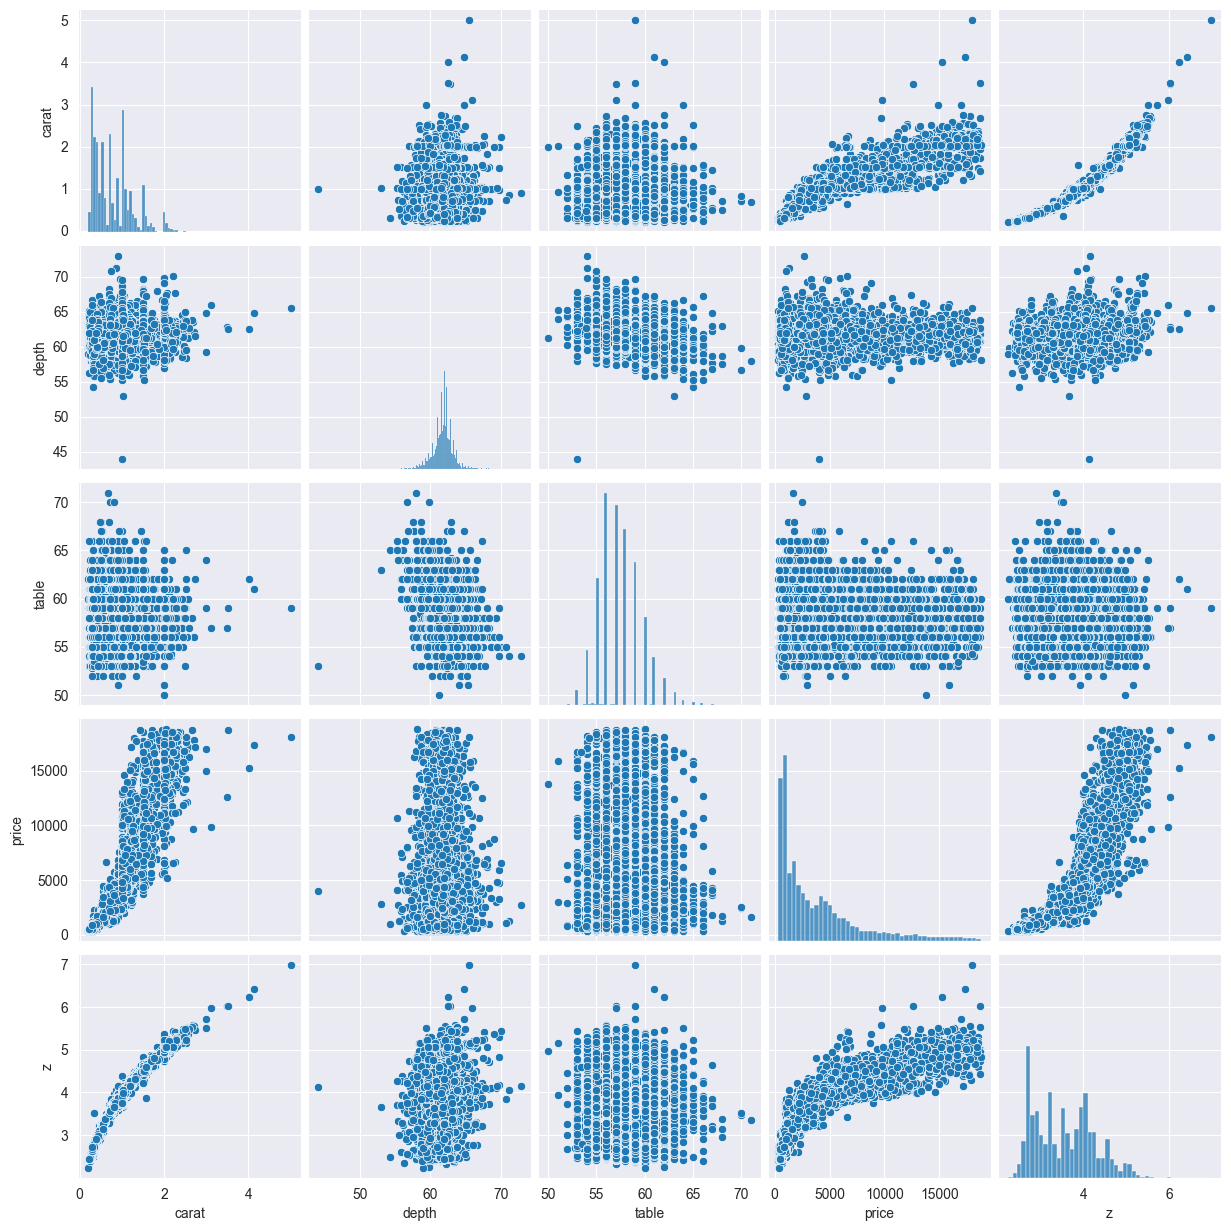

In [203]:
sns.pairplot(data=df)


In [204]:
from sklearn.linear_model import LinearRegression


def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    x = dataset[x].values
    y = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(x.reshape(-1, 1), y)

    return regressionline


def plot_regressionline(dataset: pd.DataFrame, x: str, y: str, regressielijn: LinearRegression, title: str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y],
                    data=dataset, color='black', s=100)
    sns.lineplot(dataset[x], regressielijn.predict(
        dataset[x].values.reshape(-1, 1)), color='red', linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


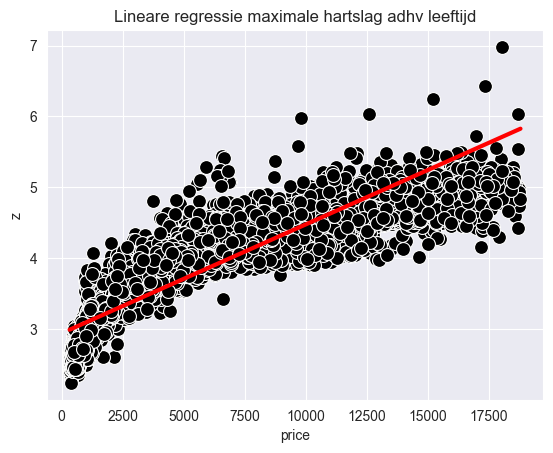

In [205]:
line = find_regressionline(df, 'price', 'z')
plot_regressionline(df, 'price', 'z', line,
                    'Lineare regressie maximale hartslag adhv leeftijd')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


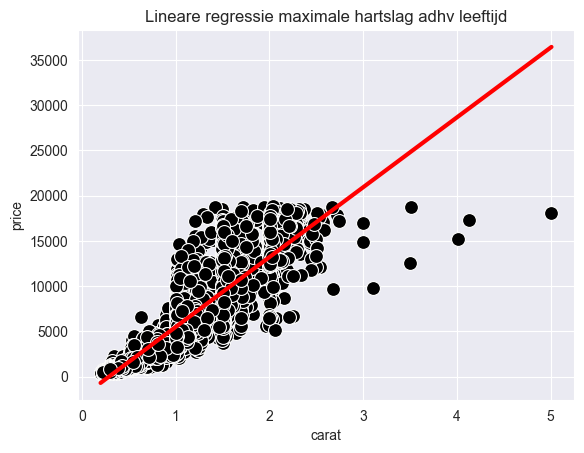

In [206]:
line = find_regressionline(df, 'carat', 'price')
plot_regressionline(df, 'carat', 'price', line,
                    'Lineare regressie maximale hartslag adhv leeftijd')




<AxesSubplot:xlabel='price', ylabel='Count'>

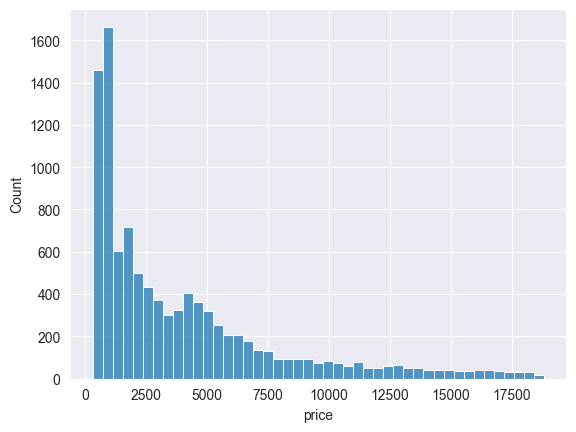

In [207]:
sns.histplot(data=df, x='price')

In [208]:
df.price.kurt()

2.0576658110977784

In [209]:
line.score(df.carat.values.reshape(-1,1),df.price)

0.851830272188749

In [210]:
df.price.mean()

3977.6324828750126

In [211]:
l=['color','clarity','cut']
for i in l:
    df = pd.concat([pd.get_dummies(df[i]), df], axis=1)
    df = df.drop(i, axis=1)
df


,Fair,Good,Ideal,Premium,Very Good,I1,IF,SI1,SI2,VS1,...,F,G,H,I,J,carat,depth,table,price,z
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0.70,62.8,57.0,2475.0,3.55
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1.10,60.0,60.0,4201.0,4.03
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.79,61.8,59.0,2275.0,3.67
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0.30,62.1,55.0,590.0,2.70
5,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,2.01,60.6,62.0,16582.0,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0.39,62.0,55.0,1008.0,2.90
12496,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1.02,61.5,56.0,3321.0,3.98
12497,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.30,63.8,55.0,895.0,2.72
12498,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0.81,61.8,55.0,3624.0,3.67


In [212]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [213]:
y = df.price
X = df.drop('price',axis=1)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
n_estimators = 4000 # mag een heel groot getal zijn
max_features = 25 # mag niet groter zijn dan je aantal kolommen in X_train
max_depth = 800 # mag redelijk groot zijn, mag ook None zijn

ai_model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)
ai_model = ai_model.fit(X_train, y_train)
y_predicted = ai_model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
r_squared = r2_score(y_test, y_predicted)

print(mse)
print(r_squared)



431249.378358941
0.97422231289831
